In [2]:
import skimage
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
import pylab
import scipy
from skimage import io

# from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.gridspec as gridspec

In [3]:
files_gamma = io.ImageCollection('/media/carminati_c/Data2/RADEN_Feb2018/07_TomoA_ARMCO/Summed_Phase_Img/recon_gamma/slice_*.tif')
ic_gamma = io.concatenate_images(files_gamma)

files_alpha = io.ImageCollection('/media/carminati_c/Data2/RADEN_Feb2018/07_TomoA_ARMCO/Summed_Phase_Img/recon_alpha/slice_*.tif')
ic_alpha = io.concatenate_images(files_alpha)

files_ref = io.ImageCollection('/media/carminati_c/Data2/RADEN_Feb2018/07_TomoA_ARMCO/Summed_Phase_Img/recon_ref/slice_*.tif')
ic_ref = io.concatenate_images(files_ref)

In [31]:
def PlotOrtogonalViews(ic,gs,title,vmin, vmax, p_spac):
    
    ax0 = plt.subplot(gs[0])
    ax0.set_title(title, fontsize=14, x=0.8)
    pos = ax0.get_position().get_points().flatten()
    ax0.imshow(ic[:,int(ic.shape[1]/2),:], cmap='gray', vmin=vmin, vmax=vmax)
    x1 = np.arange(0,ic[:,int(ic.shape[1]/2),:].shape[1])
    y1 = np.ones(len(x1))*ic.shape[0]/4
    ax0.plot(x1,y1,'-',color='yellow')
    x2=np.ones(ic[:,int(ic.shape[1]/2),:].shape[0])*(ic[:,int(ic.shape[1]/2),:].shape[1]/2)
    y2=np.arange(0,len(x2))
    ax0.plot(x2,y2,'-',color='yellow')

    ax0.axis('off')
    ax0.set_aspect(1)
    ax0.axis('tight')
    ax0.get_position().get_points().flatten()

    ax1 = plt.subplot(gs[1],sharey=ax0)
    ax1.imshow(ic[:,:,int(ic.shape[2]/2)], cmap='gray', vmin=vmin, vmax=vmax)
#     scalebar = ScaleBar(p_spac,'mm',frameon='false', color='k', location='upper right')
#     ax1.add_artist(scalebar)
    x1 = np.arange(0,ic[:,:,int(ic.shape[2]/2)].shape[1])
    y1 = np.ones(len(x1))*ic.shape[0]/4
    ax1.plot(x1,y1,'-',color='yellow')
    x2=np.ones(ic[:,:,int(ic.shape[2]/2)].shape[0])*(ic[:,:,int(ic.shape[2]/2)].shape[1]/2)
    y2=np.arange(0,len(x2))
    ax1.plot(x2,y2,'-',color='yellow')
#     ax1.set_xlim([0,ic.shape[1]]-1)
#     ax1.set_ylim([0,ic.shape[0]]-1)
    ax1.axis('off')
    ax1.set_aspect(1)
    ax1.axis('tight')
        


    ax2 = plt.subplot(gs[2],sharex=ax0)
    im=ax2.imshow(ic[int(ic.shape[0]/4),:,:], cmap='gray', vmin=vmin, vmax=vmax)
    x1 = np.arange(0,ic[int(ic.shape[0]/2),:,:].shape[1])
    y1 = np.ones(len(x1))*ic.shape[1]/2
    ax2.plot(x1,y1,'-',color='yellow')
    x2=np.ones(ic[int(ic.shape[0]/2),:,:].shape[0])*(ic[int(ic.shape[0]/2),:,:].shape[1]/2)
    y2=np.arange(0,len(x2))
    ax2.plot(x2,y2,'-',color='yellow')
    ax2.axis('off')
#     ax2.set_xlim([0,ic.shape[2]])
#     ax2.set_ylim([0,ic.shape[1]])
    ax2.set_aspect(1)
    ax2.axis('tight')
    
    ax3=plt.subplot(gs[3],sharex=ax1)
    p = ax3.get_position().get_points().flatten()
#     print(p)
    bounds = [vmin,(vmin+(vmax-vmin)/2),vmax]
#     print(bounds)
#     ax_cbar = fig.add_axes([p[0]+0.03, 0.2, p[2]-p[0]-0.03, 0.02])
    ax_cbar = fig.add_axes([p[0]+0.005, 0.2, p[2]-p[0], 0.02])
    cb = plt.colorbar(im,cax=ax_cbar, orientation='horizontal', ticks=bounds)
    # cb.boundaries=bounds
    cb.ax.tick_params(labelsize=12)
    cb.ax.set_xticklabels([str(bounds[0]), str(bounds[1])[1:5], str(bounds[2])])  # horizontal colorbar
    ax3.axis('off')


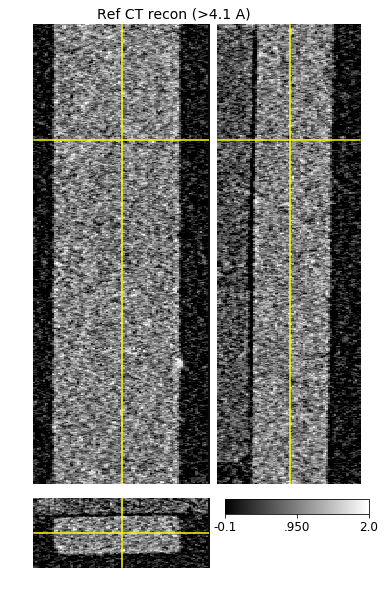

In [35]:

fig=plt.figure(figsize=(20,10))

outer = gridspec.GridSpec(1,3)


# #compute exact ratios:
myheight_ratios = [float(ic_ref.shape[0])/float(ic_ref.shape[1]),1]
mywidth_ratios = [1, float(ic_ref.shape[1])/float(ic_ref.shape[2])]


gs = gridspec.GridSpecFromSubplotSpec(2,2,subplot_spec=outer[0],wspace=0.05, hspace=0.05,  height_ratios=myheight_ratios, width_ratios=mywidth_ratios)
PlotOrtogonalViews(ic_ref,gs,'Ref CT recon (>4.1 A)', -0.1, 2.0, 0.055)
plt.savefig('CT_ref_OS.pdf')

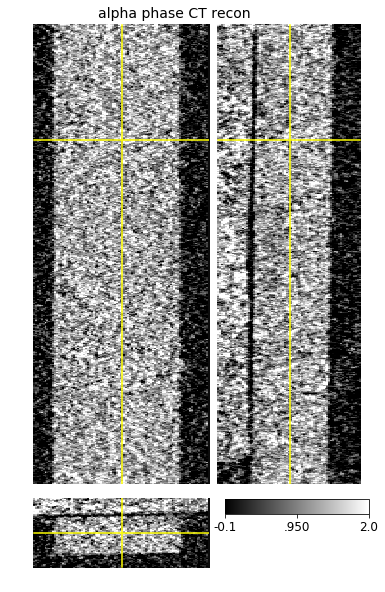

In [36]:
fig=plt.figure(figsize=(20,10))

outer = gridspec.GridSpec(1,3)


# #compute exact ratios:
myheight_ratios = [float(ic_ref.shape[0])/float(ic_ref.shape[1]),1]
mywidth_ratios = [1, float(ic_ref.shape[1])/float(ic_ref.shape[2])]


gs = gridspec.GridSpecFromSubplotSpec(2,2,subplot_spec=outer[0],wspace=0.05, hspace=0.05,  height_ratios=myheight_ratios, width_ratios=mywidth_ratios)
PlotOrtogonalViews(ic_alpha,gs,'alpha phase CT recon', -0.1, 2.0, 0.055)
plt.savefig('CT_alpha_OS.pdf')

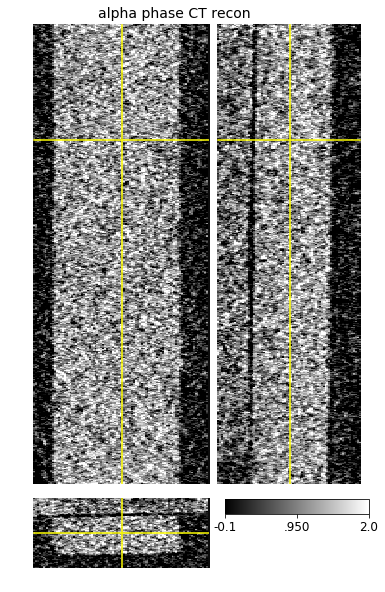

In [37]:
fig=plt.figure(figsize=(20,10))

outer = gridspec.GridSpec(1,3)


# #compute exact ratios:
myheight_ratios = [float(ic_ref.shape[0])/float(ic_ref.shape[1]),1]
mywidth_ratios = [1, float(ic_ref.shape[1])/float(ic_ref.shape[2])]


gs = gridspec.GridSpecFromSubplotSpec(2,2,subplot_spec=outer[0],wspace=0.05, hspace=0.05,  height_ratios=myheight_ratios, width_ratios=mywidth_ratios)
PlotOrtogonalViews(ic_gamma,gs,'alpha phase CT recon', -0.1, 2.0, 0.055)
plt.savefig('CT_gamma_OS.pdf')

In [44]:
gamma_ref = ic_gamma/ic_ref
alpha_ref = ic_alpha/ic_ref

/home/carminati_c/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/carminati_c/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/carminati_c/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/carminati_c/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


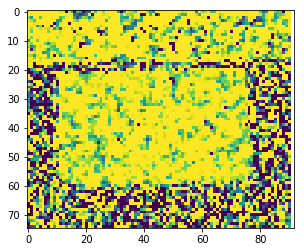

In [53]:
plt.imshow(gamma_ref[100,:,:], vmin=-.0, vmax=1.0)

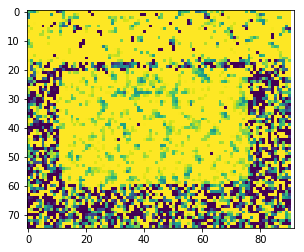

In [52]:
plt.imshow(alpha_ref[100,:,:], vmin=-.0, vmax=1.0)

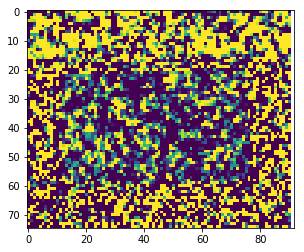

In [54]:
plt.imshow(alpha_ref[100,:,:]-gamma_ref[100,:,:], vmin=-.0, vmax=1.0)

In [55]:
def PlotOrtogonalViewsBlue(ic,gs,title,vmin, vmax, p_spac):
    
    ax0 = plt.subplot(gs[0])
    ax0.set_title(title, fontsize=14, x=0.8)
    pos = ax0.get_position().get_points().flatten()
    ax0.imshow(ic[:,int(ic.shape[1]/2),:], vmin=vmin, vmax=vmax)
    x1 = np.arange(0,ic[:,int(ic.shape[1]/2),:].shape[1])
    y1 = np.ones(len(x1))*ic.shape[0]/4
    ax0.plot(x1,y1,'-',color='yellow')
    x2=np.ones(ic[:,int(ic.shape[1]/2),:].shape[0])*(ic[:,int(ic.shape[1]/2),:].shape[1]/2)
    y2=np.arange(0,len(x2))
    ax0.plot(x2,y2,'-',color='yellow')

    ax0.axis('off')
    ax0.set_aspect(1)
    ax0.axis('tight')
    ax0.get_position().get_points().flatten()

    ax1 = plt.subplot(gs[1],sharey=ax0)
    ax1.imshow(ic[:,:,int(ic.shape[2]/2)], vmin=vmin, vmax=vmax)
#     scalebar = ScaleBar(p_spac,'mm',frameon='false', color='k', location='upper right')
#     ax1.add_artist(scalebar)
    x1 = np.arange(0,ic[:,:,int(ic.shape[2]/2)].shape[1])
    y1 = np.ones(len(x1))*ic.shape[0]/4
    ax1.plot(x1,y1,'-',color='yellow')
    x2=np.ones(ic[:,:,int(ic.shape[2]/2)].shape[0])*(ic[:,:,int(ic.shape[2]/2)].shape[1]/2)
    y2=np.arange(0,len(x2))
    ax1.plot(x2,y2,'-',color='yellow')
#     ax1.set_xlim([0,ic.shape[1]]-1)
#     ax1.set_ylim([0,ic.shape[0]]-1)
    ax1.axis('off')
    ax1.set_aspect(1)
    ax1.axis('tight')
        


    ax2 = plt.subplot(gs[2],sharex=ax0)
    im=ax2.imshow(ic[int(ic.shape[0]/4),:,:], vmin=vmin, vmax=vmax)
    x1 = np.arange(0,ic[int(ic.shape[0]/2),:,:].shape[1])
    y1 = np.ones(len(x1))*ic.shape[1]/2
    ax2.plot(x1,y1,'-',color='yellow')
    x2=np.ones(ic[int(ic.shape[0]/2),:,:].shape[0])*(ic[int(ic.shape[0]/2),:,:].shape[1]/2)
    y2=np.arange(0,len(x2))
    ax2.plot(x2,y2,'-',color='yellow')
    ax2.axis('off')
#     ax2.set_xlim([0,ic.shape[2]])
#     ax2.set_ylim([0,ic.shape[1]])
    ax2.set_aspect(1)
    ax2.axis('tight')
    
    ax3=plt.subplot(gs[3],sharex=ax1)
    p = ax3.get_position().get_points().flatten()
#     print(p)
    bounds = [vmin,(vmin+(vmax-vmin)/2),vmax]
#     print(bounds)
#     ax_cbar = fig.add_axes([p[0]+0.03, 0.2, p[2]-p[0]-0.03, 0.02])
    ax_cbar = fig.add_axes([p[0]+0.005, 0.2, p[2]-p[0], 0.02])
    cb = plt.colorbar(im,cax=ax_cbar, orientation='horizontal', ticks=bounds)
    # cb.boundaries=bounds
    cb.ax.tick_params(labelsize=12)
    cb.ax.set_xticklabels([str(bounds[0]), str(bounds[1])[1:5], str(bounds[2])])  # horizontal colorbar
    ax3.axis('off')

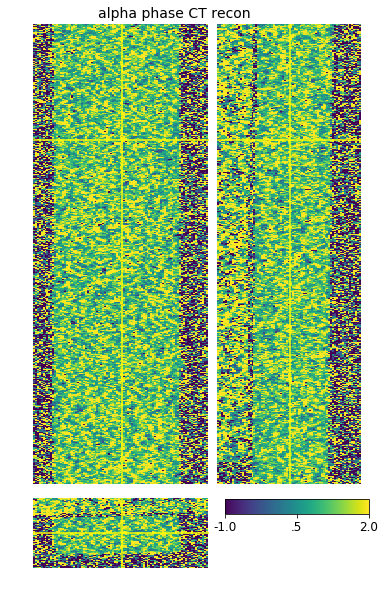

In [61]:
fig=plt.figure(figsize=(20,10))

outer = gridspec.GridSpec(1,3)


# #compute exact ratios:
myheight_ratios = [float(ic_ref.shape[0])/float(ic_ref.shape[1]),1]
mywidth_ratios = [1, float(ic_ref.shape[1])/float(ic_ref.shape[2])]


gs = gridspec.GridSpecFromSubplotSpec(2,2,subplot_spec=outer[0],wspace=0.05, hspace=0.05,  height_ratios=myheight_ratios, width_ratios=mywidth_ratios)
PlotOrtogonalViewsBlue(gamma_ref,gs,'alpha phase CT recon', -1.0, 2.0, 0.055)
plt.savefig('CT_gamma_ref.pdf')

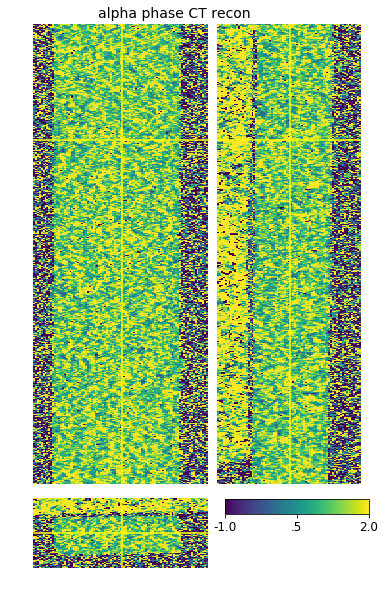

In [62]:
fig=plt.figure(figsize=(20,10))

outer = gridspec.GridSpec(1,3)


# #compute exact ratios:
myheight_ratios = [float(ic_ref.shape[0])/float(ic_ref.shape[1]),1]
mywidth_ratios = [1, float(ic_ref.shape[1])/float(ic_ref.shape[2])]


gs = gridspec.GridSpecFromSubplotSpec(2,2,subplot_spec=outer[0],wspace=0.05, hspace=0.05,  height_ratios=myheight_ratios, width_ratios=mywidth_ratios)
PlotOrtogonalViewsBlue(alpha_ref,gs,'alpha phase CT recon', -1.0, 2.0, 0.055)
plt.savefig('CT_alpha_ref.pdf')

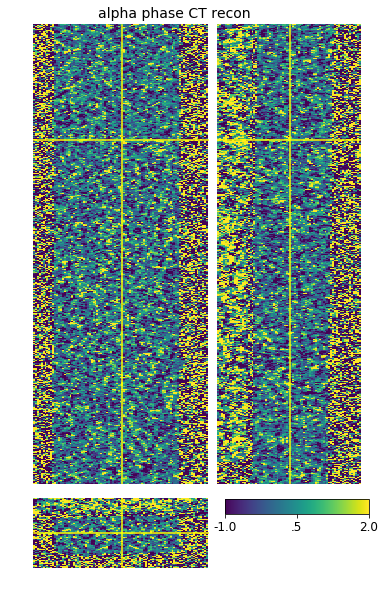

In [63]:
fig=plt.figure(figsize=(20,10))

outer = gridspec.GridSpec(1,3)


# #compute exact ratios:
myheight_ratios = [float(ic_ref.shape[0])/float(ic_ref.shape[1]),1]
mywidth_ratios = [1, float(ic_ref.shape[1])/float(ic_ref.shape[2])]


gs = gridspec.GridSpecFromSubplotSpec(2,2,subplot_spec=outer[0],wspace=0.05, hspace=0.05,  height_ratios=myheight_ratios, width_ratios=mywidth_ratios)
PlotOrtogonalViewsBlue(alpha_ref-gamma_ref,gs,'alpha phase CT recon', -1.0, 2.0, 0.055)
plt.savefig('CT_alpha_gamma_ref.pdf')

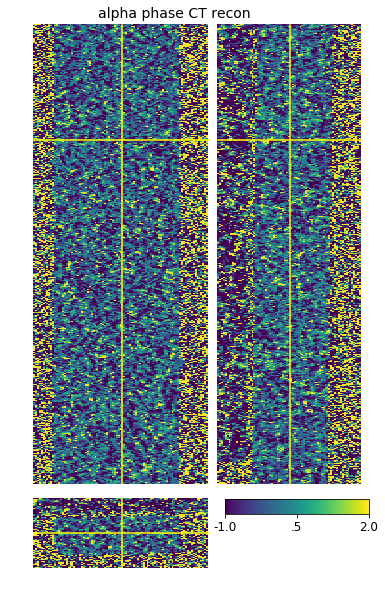

In [64]:
fig=plt.figure(figsize=(20,10))

outer = gridspec.GridSpec(1,3)


# #compute exact ratios:
myheight_ratios = [float(ic_ref.shape[0])/float(ic_ref.shape[1]),1]
mywidth_ratios = [1, float(ic_ref.shape[1])/float(ic_ref.shape[2])]


gs = gridspec.GridSpecFromSubplotSpec(2,2,subplot_spec=outer[0],wspace=0.05, hspace=0.05,  height_ratios=myheight_ratios, width_ratios=mywidth_ratios)
PlotOrtogonalViewsBlue(gamma_ref-alpha_ref,gs,'alpha phase CT recon', -1.0, 2.0, 0.055)
plt.savefig('CT_gamma_alpha_ref.pdf')

In [67]:
alpha = "alpha.txt"
wave= "lambda.txt"
gamma = 'gamma.txt'
#path_to_file = os.path.join(base_path, filename)
#fd = open(path_to_file , 'r')

x_wave = np.genfromtxt(wave)
y_alpha = np.genfromtxt(alpha)
y_gamma = np.genfromtxt(gamma)

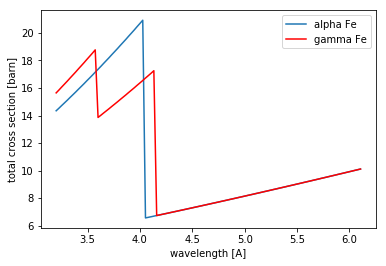

In [85]:
plt.plot(x_wave[120:230],y_alpha[120:230], label='alpha Fe')
plt.plot(x_wave[120:230], y_gamma[120:230],'r', label='gamma Fe')
plt.xlabel('wavelength [A]')
plt.ylabel('total cross section [barn]')
plt.legend()
plt.savefig('plotSpectra_phase.pdf')

In [81]:
print(x_wave[120:230], len(x_wave))

[3.2   3.227 3.253 3.28  3.307 3.333 3.36  3.387 3.413 3.44  3.467 3.493
 3.52  3.547 3.573 3.6   3.627 3.653 3.68  3.707 3.733 3.76  3.787 3.813
 3.84  3.867 3.893 3.92  3.947 3.973 4.    4.027 4.053 4.08  4.107 4.133
 4.16  4.187 4.213 4.24  4.267 4.293 4.32  4.347 4.373 4.4   4.427 4.453
 4.48  4.507 4.533 4.56  4.587 4.613 4.64  4.667 4.693 4.72  4.747 4.773
 4.8   4.827 4.853 4.88  4.907 4.933 4.96  4.987 5.013 5.04  5.067 5.093
 5.12  5.147 5.173 5.2   5.227 5.253 5.28  5.307 5.333 5.36  5.387 5.413
 5.44  5.467 5.493 5.52  5.547 5.573 5.6   5.627 5.653 5.68  5.707 5.733
 5.76  5.787 5.813 5.84  5.867 5.893 5.92  5.947 5.973 6.    6.027 6.053
 6.08  6.107] 300
